In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

In [14]:
train = pd.read_csv(r"C:\Users\sumit\OneDrive\Desktop\bank+marketing\bank\bank-full.csv",sep=';')
test = pd.read_csv(r"C:\Users\sumit\OneDrive\Desktop\bank+marketing\bank\bank.csv",sep=';')

In [15]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [18]:
print(train.shape)
print(test.shape)

(45211, 17)
(4521, 17)


In [19]:
train['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# EDA

In [20]:
train['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [22]:
train['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

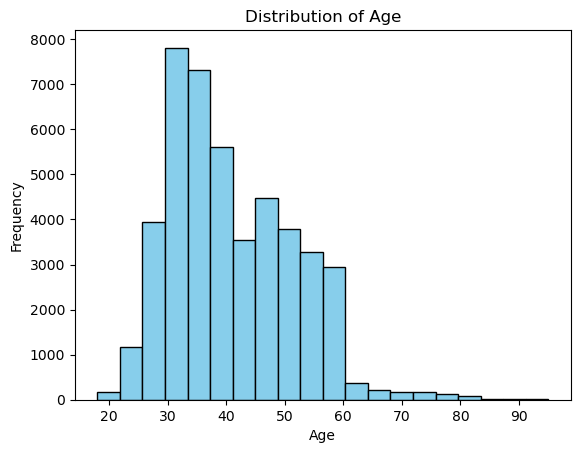

In [23]:
import matplotlib.pyplot as plt

plt.hist(train['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


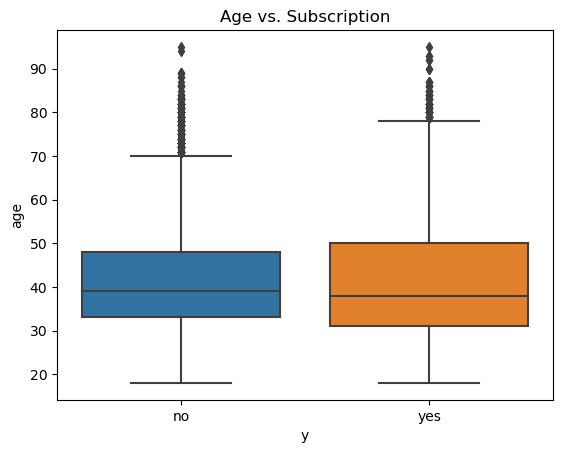

In [24]:
import seaborn as sns

sns.boxplot(x='y', y='age', data=train)
plt.title('Age vs. Subscription')
plt.show()


In [25]:
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']

train['age_group'] = pd.cut(train['age'], bins=bins, labels=labels)


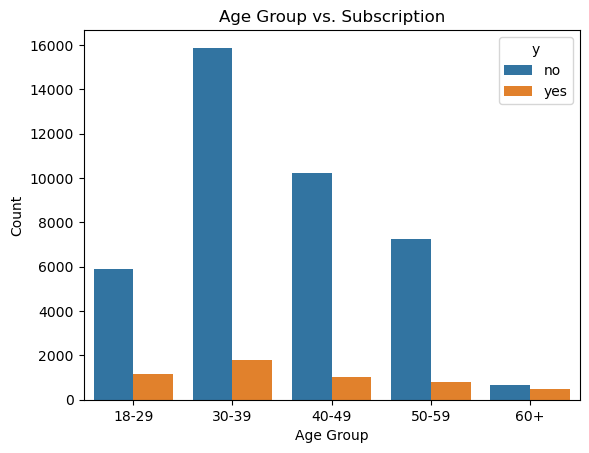

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='age_group', hue='y', data=train)
plt.title('Age Group vs. Subscription')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


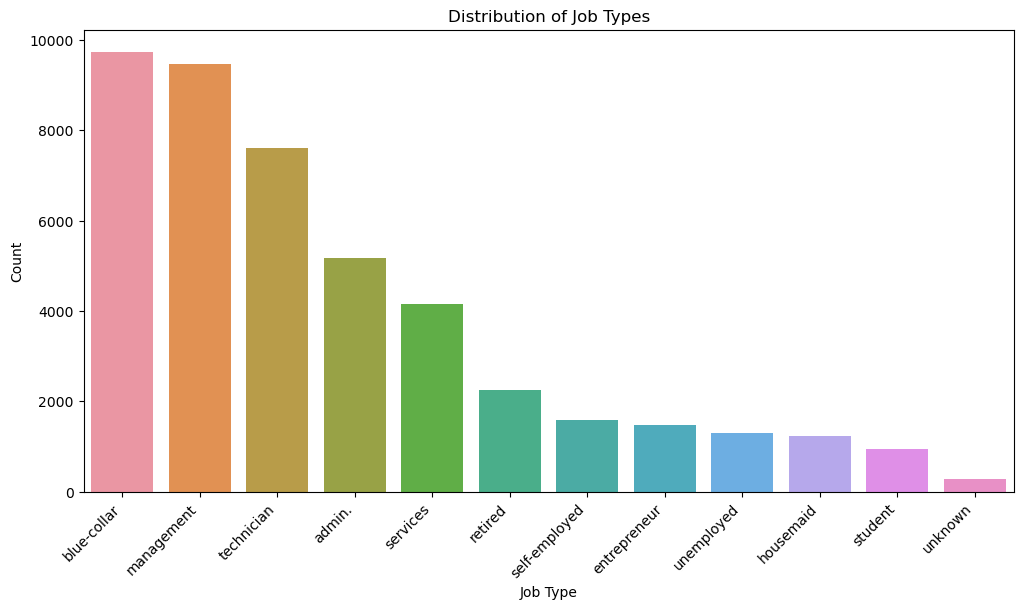

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=train, order=train['job'].value_counts().index)
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


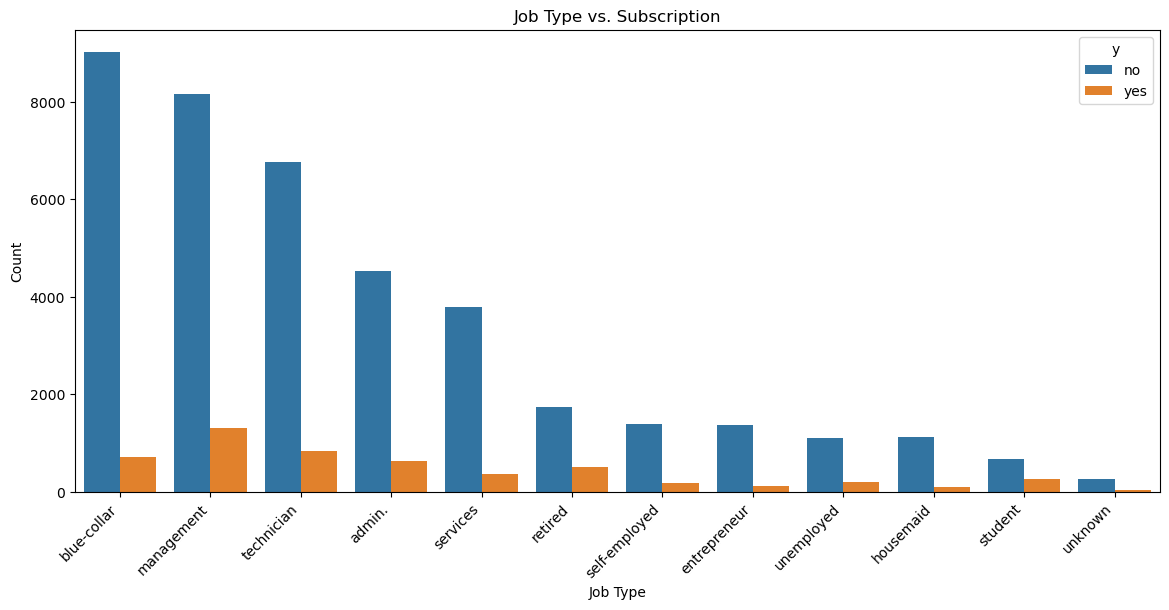

In [28]:
plt.figure(figsize=(14, 6))
sns.countplot(x='job', hue='y', data=train, order=train['job'].value_counts().index)
plt.title('Job Type vs. Subscription')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


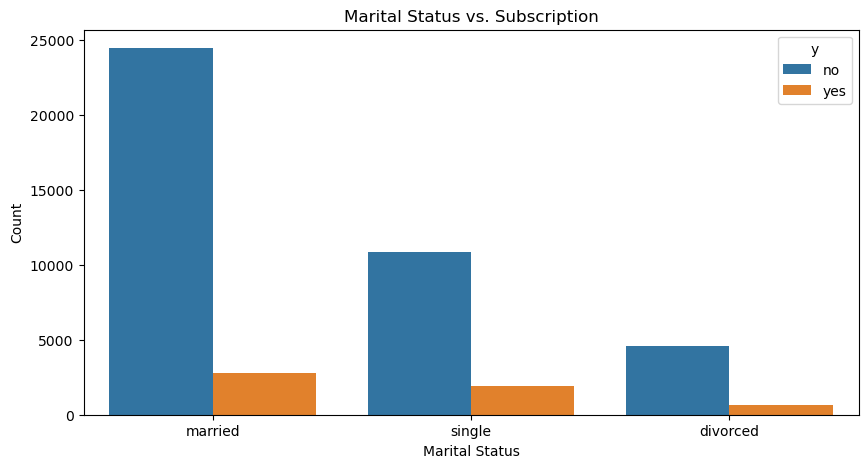

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x='marital', hue='y', data=train, order=train['marital'].value_counts().index)
plt.title('Marital Status vs. Subscription')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


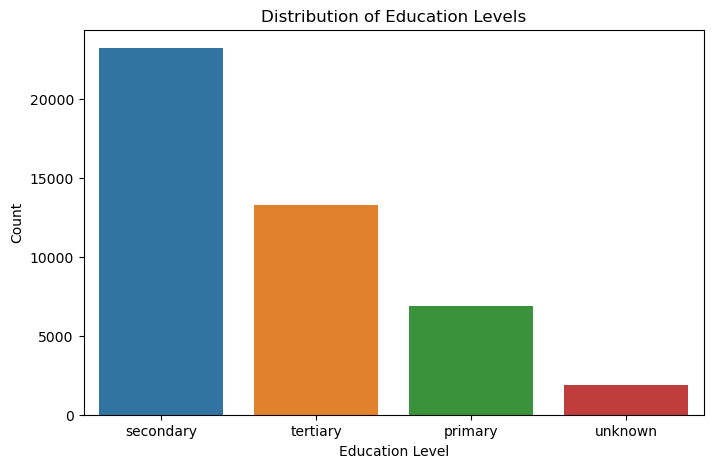

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='education', data=train, order=train['education'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


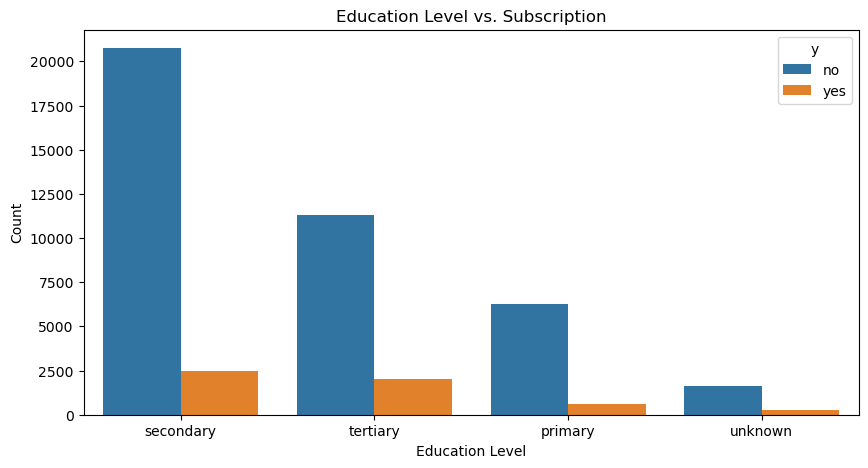

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(x='education', hue='y', data=train, order=train['education'].value_counts().index)
plt.title('Education Level vs. Subscription')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


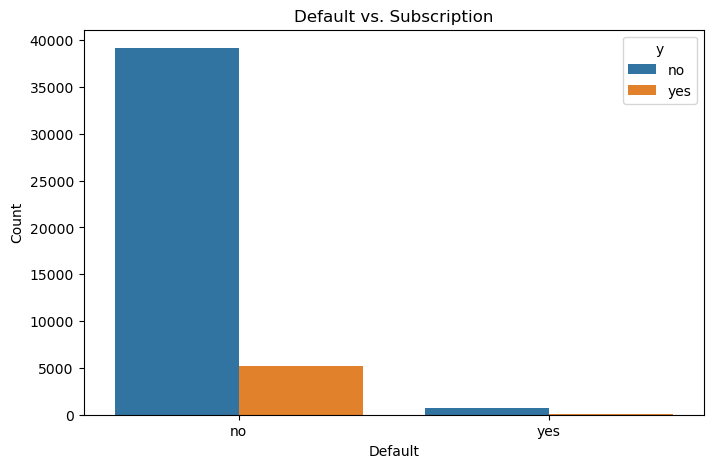

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(x='default', hue='y', data=train)
plt.title('Default vs. Subscription')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()


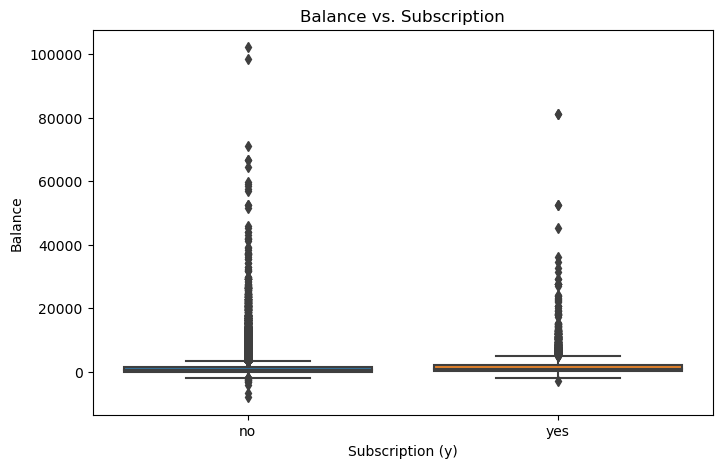

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='y', y='balance', data=train)
plt.title('Balance vs. Subscription')
plt.xlabel('Subscription (y)')
plt.ylabel('Balance')
plt.show()


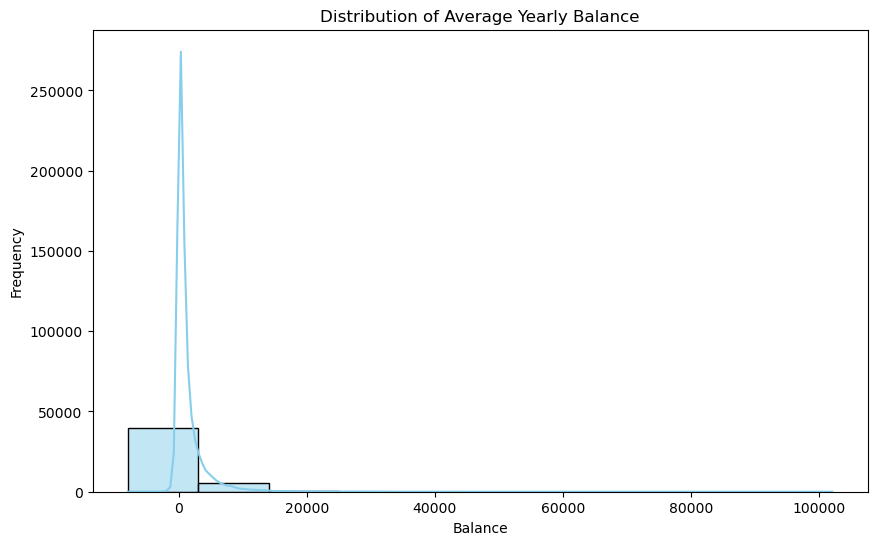

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(train['balance'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Yearly Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()


In [54]:
# Create a binary feature indicating whether balance is less than or equal to 10,000
train['balance_category'] = (train['balance'] <= 10000).astype(int)

# Check the new feature
print(train[['balance', 'balance_category']].head(10))


   balance  balance_category
0     2143                 1
1       29                 1
2        2                 1
3     1506                 1
4        1                 1
5      231                 1
6      447                 1
7        2                 1
8      121                 1
9      593                 1


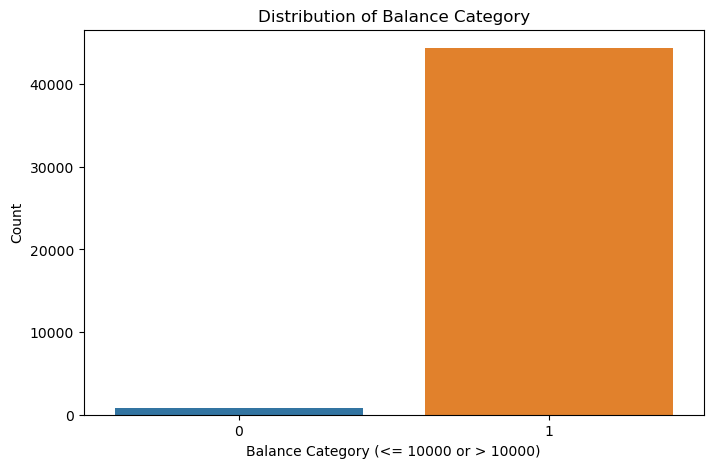

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the new categorical variable
plt.figure(figsize=(8, 5))
sns.countplot(x='balance_category', data=train)
plt.title('Distribution of Balance Category')
plt.xlabel('Balance Category (<= 10000 or > 10000)')
plt.ylabel('Count')
plt.show()


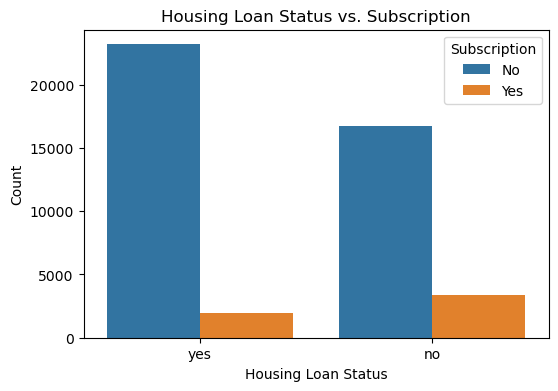

In [58]:
plt.figure(figsize=(6, 4))
sns.countplot(x='housing', hue='y', data=train, order=train['housing'].value_counts().index)
plt.title('Housing Loan Status vs. Subscription')
plt.xlabel('Housing Loan Status')
plt.ylabel('Count')
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])
plt.show()


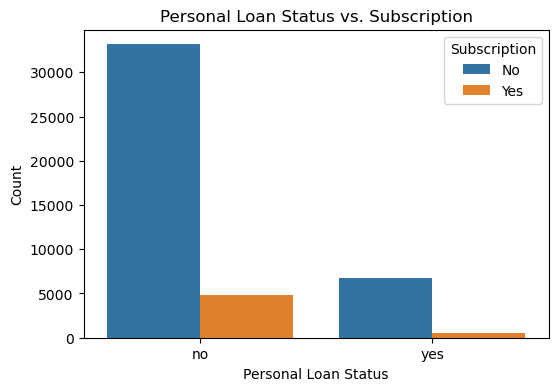

In [59]:
plt.figure(figsize=(6, 4))
sns.countplot(x='loan', hue='y', data=train, order=train['loan'].value_counts().index)
plt.title('Personal Loan Status vs. Subscription')
plt.xlabel('Personal Loan Status')
plt.ylabel('Count')
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])
plt.show()



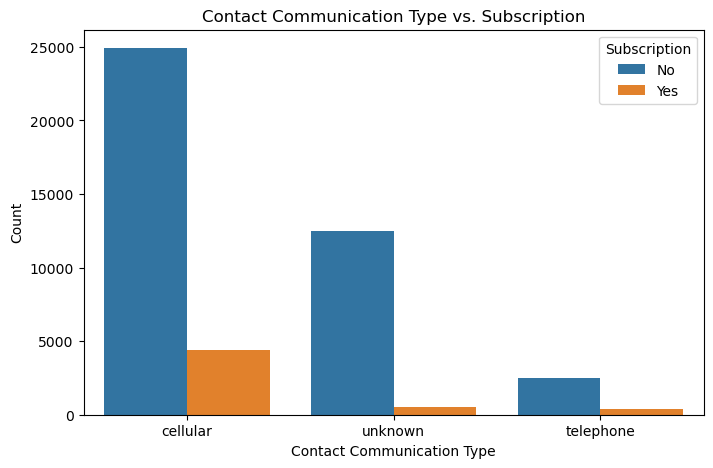

In [60]:
plt.figure(figsize=(8, 5))
sns.countplot(x='contact', hue='y', data=train, order=train['contact'].value_counts().index)
plt.title('Contact Communication Type vs. Subscription')
plt.xlabel('Contact Communication Type')
plt.ylabel('Count')
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])
plt.show()


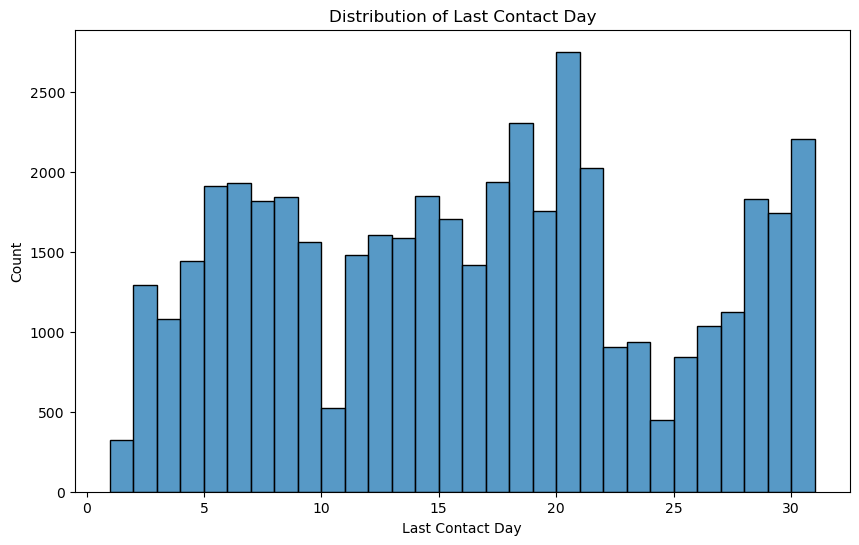

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(train['day'], bins=30, kde=False)
plt.title('Distribution of Last Contact Day')
plt.xlabel('Last Contact Day')
plt.ylabel('Count')
plt.show()


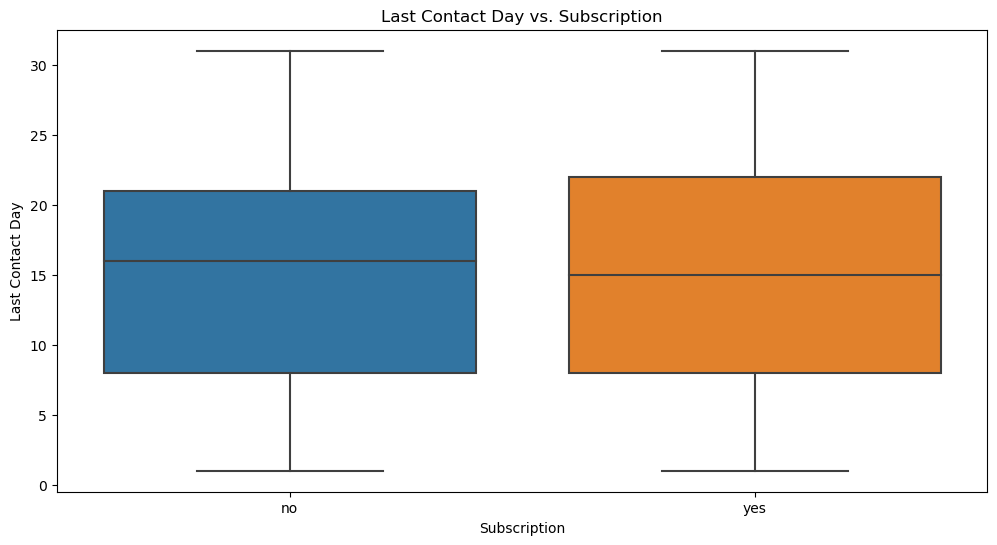

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='y', y='day', data=train)
plt.title('Last Contact Day vs. Subscription')
plt.xlabel('Subscription')
plt.ylabel('Last Contact Day')
plt.show()


In [63]:
# Binning 'day' into categories (e.g., weekdays and weekends)
bins = [0, 15, 31]
labels = ['first_half', 'second_half']
train['day_category'] = pd.cut(train['day'], bins=bins, labels=labels, right=False)


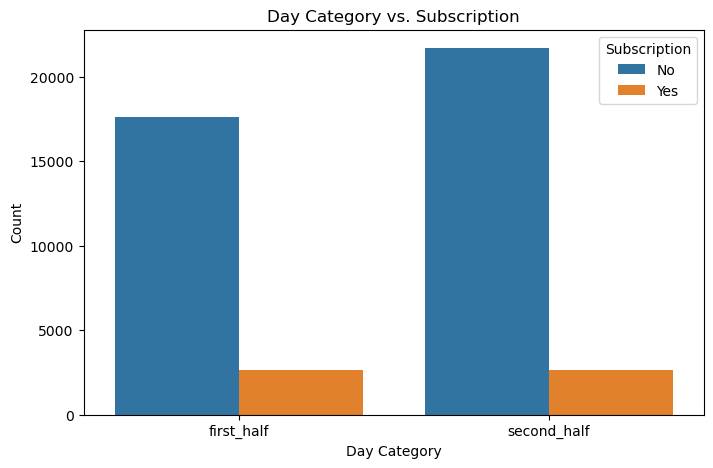

In [64]:
plt.figure(figsize=(8, 5))
sns.countplot(x='day_category', hue='y', data=train)
plt.title('Day Category vs. Subscription')
plt.xlabel('Day Category')
plt.ylabel('Count')
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])
plt.show()


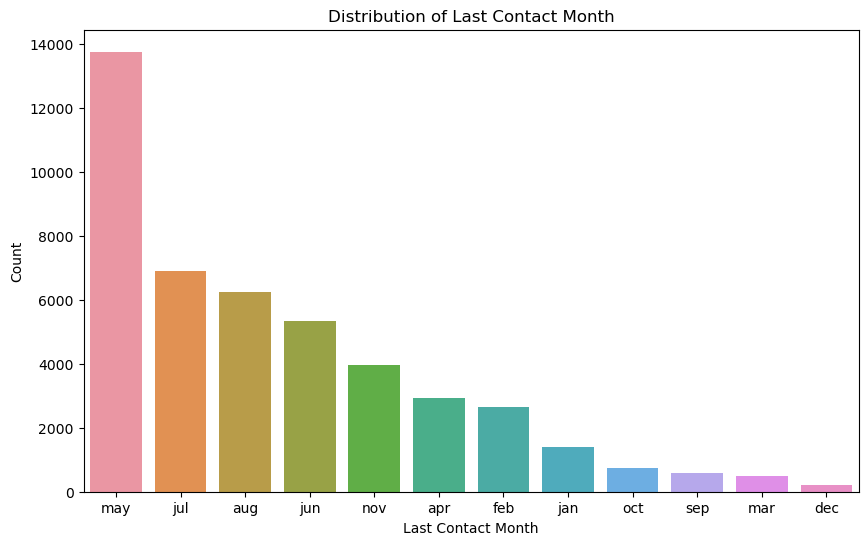

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=train, order=train['month'].value_counts().index)
plt.title('Distribution of Last Contact Month')
plt.xlabel('Last Contact Month')
plt.ylabel('Count')
plt.show()


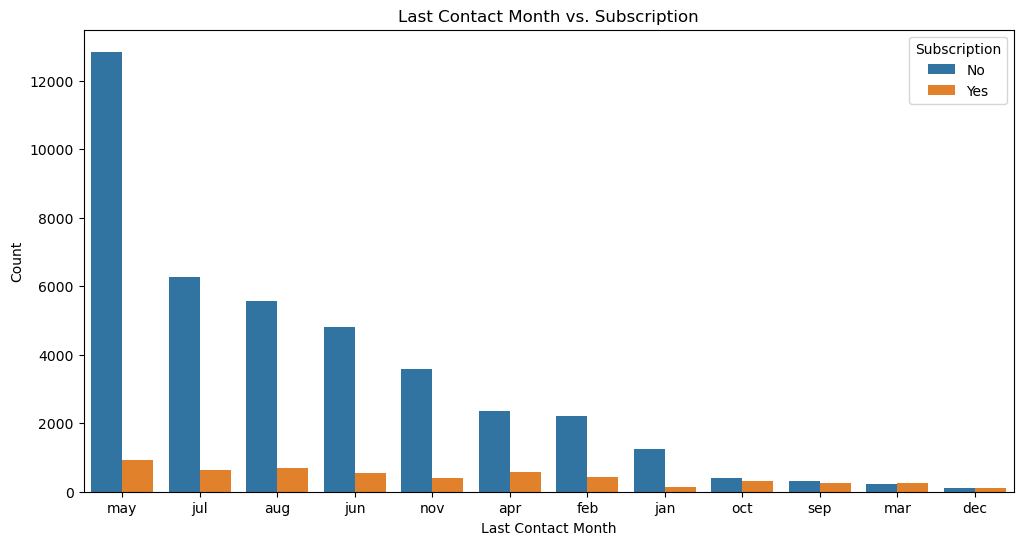

In [66]:
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='y', data=train, order=train['month'].value_counts().index)
plt.title('Last Contact Month vs. Subscription')
plt.xlabel('Last Contact Month')
plt.ylabel('Count')
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])
plt.show()


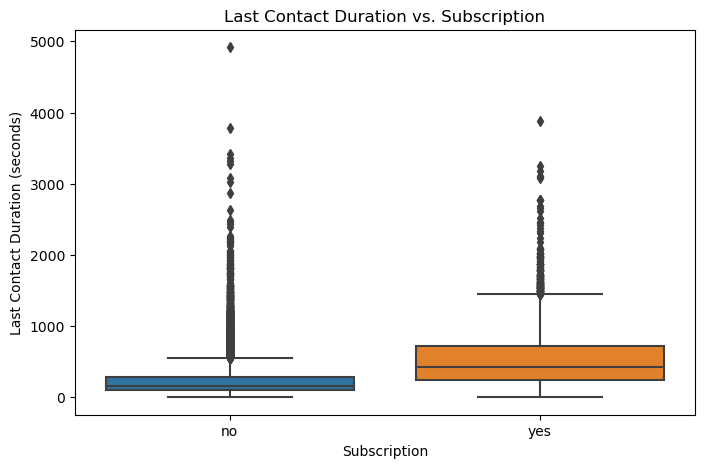

In [67]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='y', y='duration', data=train)
plt.title('Last Contact Duration vs. Subscription')
plt.xlabel('Subscription')
plt.ylabel('Last Contact Duration (seconds)')
plt.show()


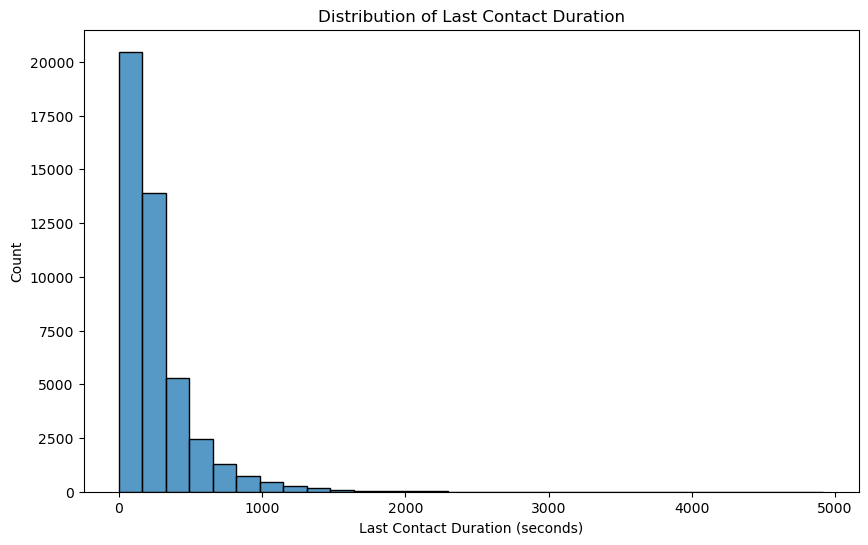

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(train['duration'], bins=30, kde=False)
plt.title('Distribution of Last Contact Duration')
plt.xlabel('Last Contact Duration (seconds)')
plt.ylabel('Count')
plt.show()


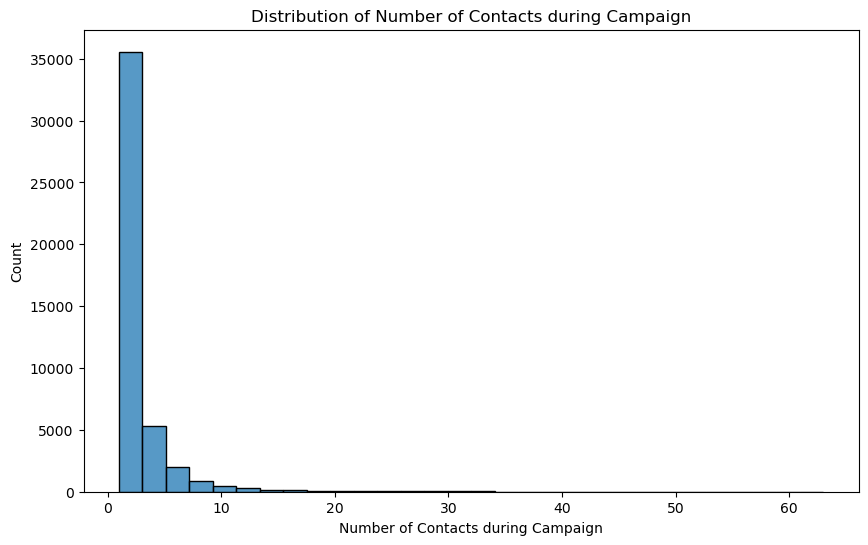

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(train['campaign'], bins=30, kde=False)
plt.title('Distribution of Number of Contacts during Campaign')
plt.xlabel('Number of Contacts during Campaign')
plt.ylabel('Count')
plt.show()


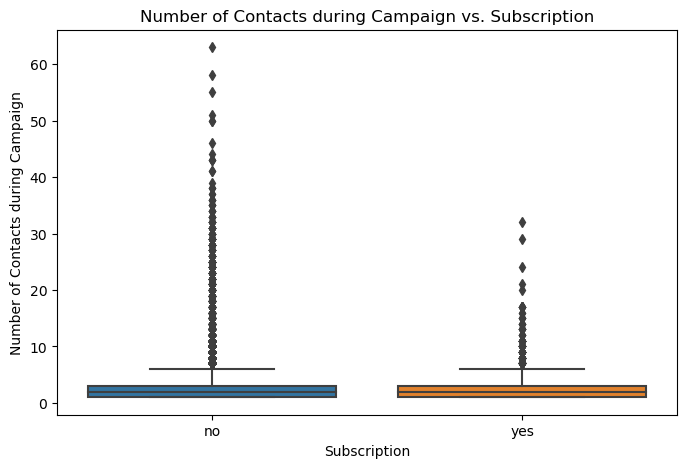

In [80]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='y', y='campaign', data=train)
plt.title('Number of Contacts during Campaign vs. Subscription')
plt.xlabel('Subscription')
plt.ylabel('Number of Contacts during Campaign')
plt.show()


In [81]:
# Binning 'campaign' into categories (e.g., low, medium, high)
bins = [0, 5, 10, float('inf')]
labels = ['low', 'medium', 'high']
train['campaign_category'] = pd.cut(train['campaign'], bins=bins, labels=labels)


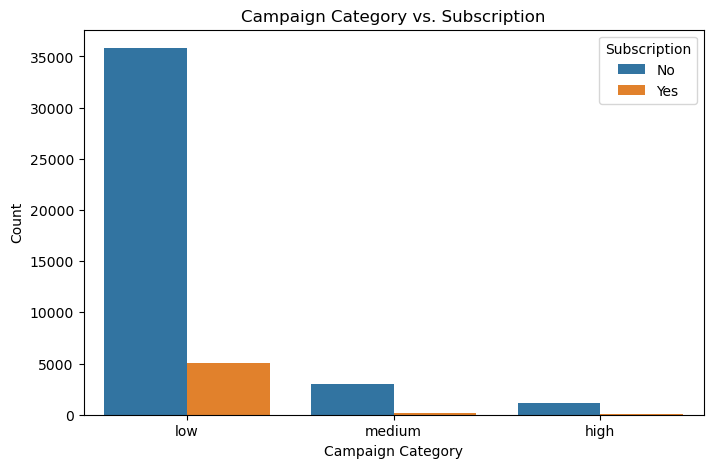

In [82]:
plt.figure(figsize=(8, 5))
sns.countplot(x='campaign_category', hue='y', data=train)
plt.title('Campaign Category vs. Subscription')
plt.xlabel('Campaign Category')
plt.ylabel('Count')
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])
plt.show()


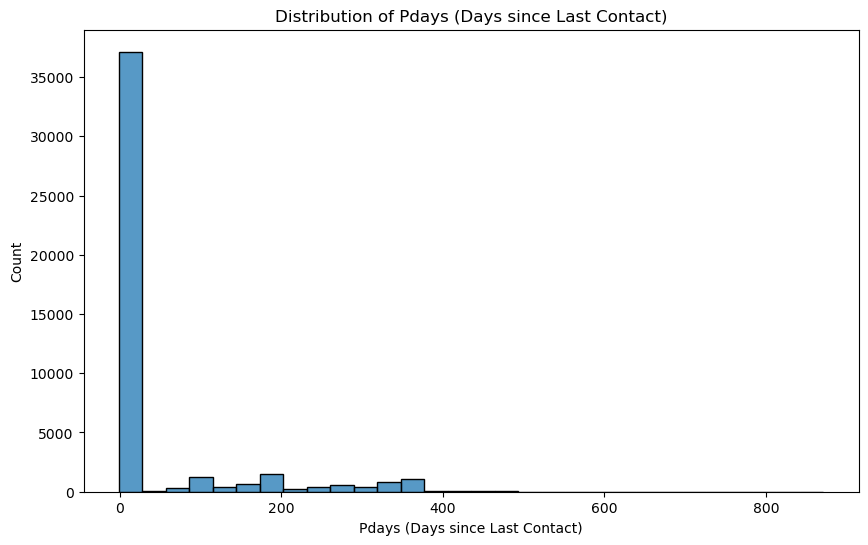

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(train['pdays'], bins=30, kde=False)
plt.title('Distribution of Pdays (Days since Last Contact)')
plt.xlabel('Pdays (Days since Last Contact)')
plt.ylabel('Count')
plt.show()


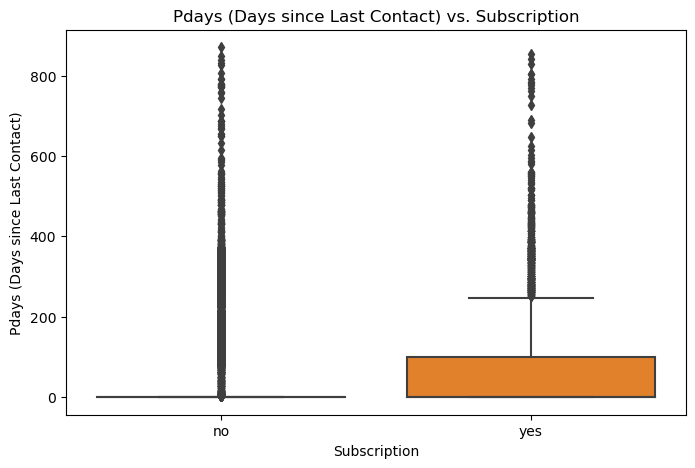

In [84]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='y', y='pdays', data=train)
plt.title('Pdays (Days since Last Contact) vs. Subscription')
plt.xlabel('Subscription')
plt.ylabel('Pdays (Days since Last Contact)')
plt.show()


In [85]:
# Binning 'pdays' into categories (e.g., low, medium, high)
bins = [-1, 50, 100, float('inf')]
labels = ['low', 'medium', 'high']
train['pdays_category'] = pd.cut(train['pdays'], bins=bins, labels=labels)


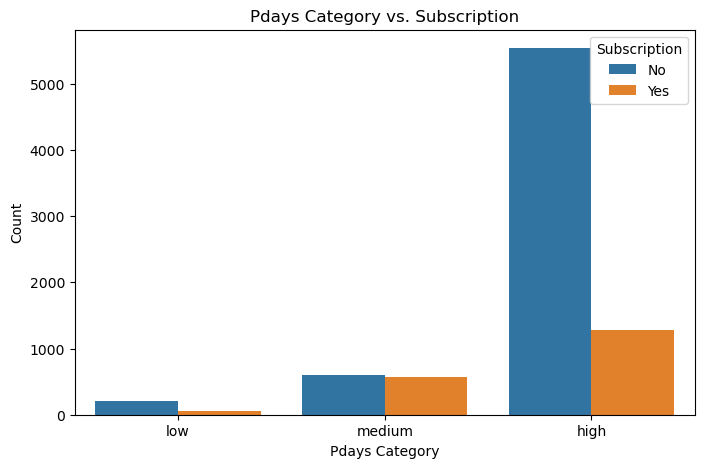

In [86]:
plt.figure(figsize=(8, 5))
sns.countplot(x='pdays_category', hue='y', data=train)
plt.title('Pdays Category vs. Subscription')
plt.xlabel('Pdays Category')
plt.ylabel('Count')
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])
plt.show()


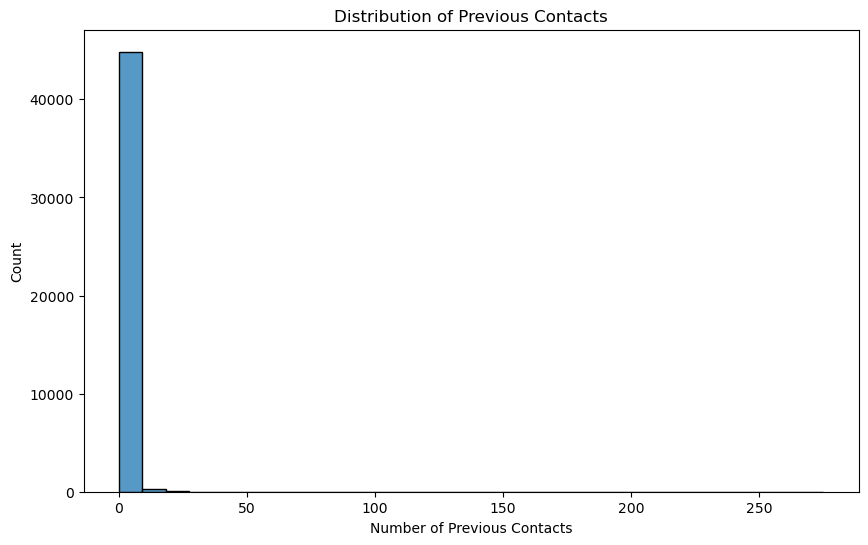

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(train['previous'], bins=30, kde=False)
plt.title('Distribution of Previous Contacts')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Count')
plt.show()


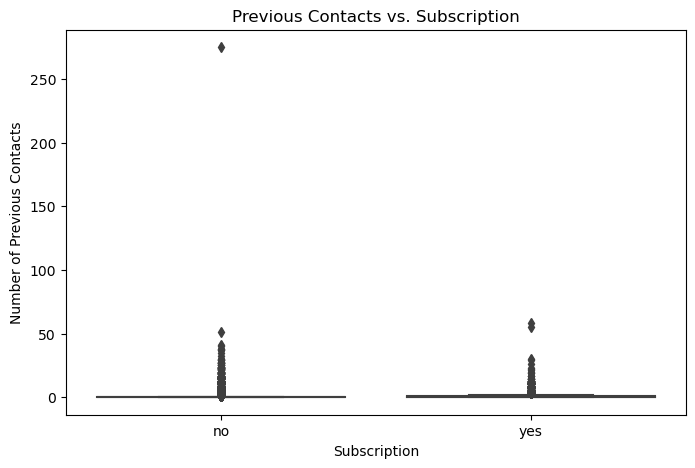

In [88]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='y', y='previous', data=train)
plt.title('Previous Contacts vs. Subscription')
plt.xlabel('Subscription')
plt.ylabel('Number of Previous Contacts')
plt.show()


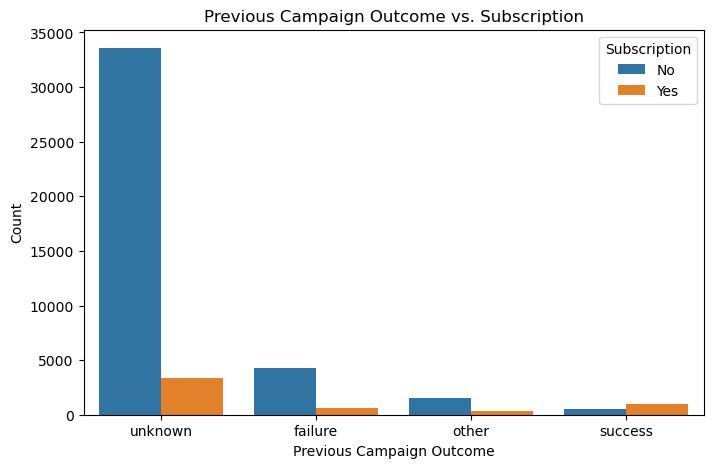

In [90]:
plt.figure(figsize=(8, 5))
sns.countplot(x='poutcome', hue='y', data=train)
plt.title('Previous Campaign Outcome vs. Subscription')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Count')
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])
plt.show()


# dropping unused columns

In [113]:
temp_train = train.copy()

In [114]:
temp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                45211 non-null  int64   
 1   job                45211 non-null  object  
 2   marital            45211 non-null  object  
 3   education          45211 non-null  object  
 4   default            45211 non-null  object  
 5   balance            45211 non-null  int64   
 6   housing            45211 non-null  object  
 7   loan               45211 non-null  object  
 8   contact            45211 non-null  object  
 9   day                45211 non-null  int64   
 10  month              45211 non-null  object  
 11  duration           45211 non-null  int64   
 12  campaign           45211 non-null  int64   
 13  pdays              45211 non-null  int64   
 14  previous           45211 non-null  int64   
 15  poutcome           45211 non-null  object  
 16  y   

In [115]:
temp_train.drop(columns = ['day','duration','previous'],inplace = True)

In [116]:
temp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                45211 non-null  int64   
 1   job                45211 non-null  object  
 2   marital            45211 non-null  object  
 3   education          45211 non-null  object  
 4   default            45211 non-null  object  
 5   balance            45211 non-null  int64   
 6   housing            45211 non-null  object  
 7   loan               45211 non-null  object  
 8   contact            45211 non-null  object  
 9   month              45211 non-null  object  
 10  campaign           45211 non-null  int64   
 11  pdays              45211 non-null  int64   
 12  poutcome           45211 non-null  object  
 13  y                  45211 non-null  object  
 14  age_group          45199 non-null  category
 15  balance_category   45211 non-null  int32   
 16  day_

In [117]:
temp_train.drop(columns = ['age','balance','day_category','campaign','pdays'],inplace = True)

In [118]:
temp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                45211 non-null  object  
 1   marital            45211 non-null  object  
 2   education          45211 non-null  object  
 3   default            45211 non-null  object  
 4   housing            45211 non-null  object  
 5   loan               45211 non-null  object  
 6   contact            45211 non-null  object  
 7   month              45211 non-null  object  
 8   poutcome           45211 non-null  object  
 9   y                  45211 non-null  object  
 10  age_group          45199 non-null  category
 11  balance_category   45211 non-null  int32   
 12  campaign_category  45211 non-null  category
 13  pdays_category     8257 non-null   category
dtypes: category(3), int32(1), object(10)
memory usage: 3.8+ MB


In [119]:
temp_train.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age_group,balance_category,campaign_category,pdays_category
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no,50-59,1,low,NaN
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no,40-49,1,low,NaN
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no,30-39,1,low,NaN
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no,40-49,1,low,NaN
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no,30-39,1,low,NaN


In [136]:

temp_train.head()

,default,housing,loan,y,balance_category,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,poutcome_success,poutcome_unknown,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60+,campaign_category_medium,campaign_category_high,pdays_category_medium,pdays_category_high
0,no,yes,no,no,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,no,yes,no,no,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,no,yes,yes,no,1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,no,yes,no,no,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,no,no,no,no,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [ ]:
temp_train = pd.get_dummies(temp_train,columns = ['job','marital','education','contact','poutcome','age_group','campaign_category','pdays_category'],drop_first = True)

In [139]:
temp_train.head()

,default,housing,loan,y,balance_category,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,poutcome_success,poutcome_unknown,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60+,campaign_category_medium,campaign_category_high,pdays_category_medium,pdays_category_high
0,no,yes,no,no,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,no,yes,no,no,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,no,yes,yes,no,1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,no,yes,no,no,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,no,no,no,no,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [140]:
temp_train.replace({'yes': 1, 'no': 0, True: 1, False: 0}, inplace=True)

In [149]:
temp_train

,default,housing,loan,y,balance_category,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,poutcome_success,poutcome_unknown,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60+,campaign_category_medium,campaign_category_high,pdays_category_medium,pdays_category_high
0,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,1,1,0,1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,0,1,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
45207,0,0,0,1,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
45208,0,0,0,1,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
45209,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


# Model building

In [151]:
X = temp_train.drop('y', axis=1)
y = temp_train['y']

In [153]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [154]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()


In [155]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [157]:
y_pred = classifier.predict(X_test)

In [159]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8724980648015039